<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning_starting_project/blob/main/market_mall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#market mall prediction...here we predict the sales amount

In [40]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from xgboost import XGBRegressor

#Data processing

In [3]:
!kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

Dataset URL: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
License(s): CC0-1.0
  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 67.5MB/s]


In [5]:
!unzip \*.zip && rm *.zip

Archive:  bigmart-sales-data.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [12]:
bigmart_data.head() #outlet refer to differ store

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
bigmart_data=pd.read_csv("/content/Train.csv")

In [7]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
bigmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
bigmart_data.shape

(8523, 12)

In [14]:
bigmart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


#preprocessing step

In [16]:
#mean value of the Item_Weight
bigmart_data['Item_Weight'].mean()

12.857645184135976

In [17]:
#filling the missing values in Item_weight by using mean
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(),inplace=True)

In [18]:
bigmart_data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [20]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [21]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [27]:
miss_values=bigmart_data['Outlet_Size'].isnull()
print(miss_values) #the output show like False means is not null and True means some values are missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [29]:
bigmart_data.loc[miss_values, 'Outlet_Size'] = bigmart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [30]:
bigmart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [31]:
bigmart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [32]:
#first replace those this one
bigmart_data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#Label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
bigmart_data['Item_Identifier']=LabelEncoder().fit_transform(bigmart_data['Item_Identifier'])
bigmart_data['Item_Fat_Content']=LabelEncoder().fit_transform(bigmart_data['Item_Fat_Content'])
bigmart_data['Item_Type']=LabelEncoder().fit_transform(bigmart_data['Item_Type'])
bigmart_data['Outlet_Identifier']=LabelEncoder().fit_transform(bigmart_data['Outlet_Identifier'])
bigmart_data['Outlet_Size']=LabelEncoder().fit_transform(bigmart_data['Outlet_Size'])
bigmart_data['Outlet_Location_Type']=LabelEncoder().fit_transform(bigmart_data['Outlet_Location_Type'])
bigmart_data['Outlet_Type']=LabelEncoder().fit_transform(bigmart_data['Outlet_Type'])


In [36]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


#split the data into training and testing data

In [37]:
x=bigmart_data.drop(columns='Item_Outlet_Sales',axis=1)
y=bigmart_data['Item_Outlet_Sales']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


#model building in XGBRegressor

In [41]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
#model evaluation
test_data_prediction=model.predict(x_test)
error_score=metrics.r2_score(y_test,test_data_prediction)
print('RMSE ',error_score)

RMSE  0.49987027827359043


In [43]:
train_data_prediction=model.predict(x_train)
error_score=metrics.r2_score(y_train,train_data_prediction)
print('RMSE ',error_score)

RMSE  0.8705792757910047


2. #linear regression model

In [44]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [47]:
#model evaluation
test_data_prediction=model.predict(x_test)
error_score=metrics.r2_score(y_test,test_data_prediction)
print('RMSE ',error_score)

RMSE  0.5032108052945261


In [48]:
train_data_prediction=model.predict(x_train)
error_score=metrics.r2_score(y_train,train_data_prediction)
print('RMSE ',error_score)

RMSE  0.5033943875864764


Compare both XGGRegressor and Linear regression...linear regression have high performance

#Visualization

<Axes: >

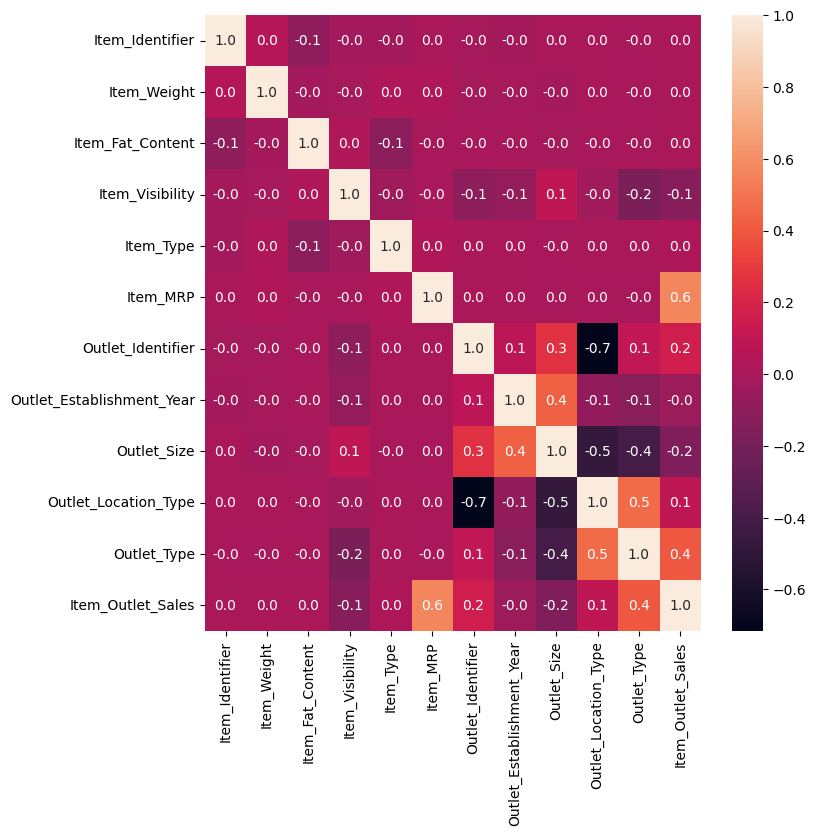

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(bigmart_data.corr(),annot=True,cbar=True,fmt='.1f')

<ipython-input-51-f7f967d709a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_data['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

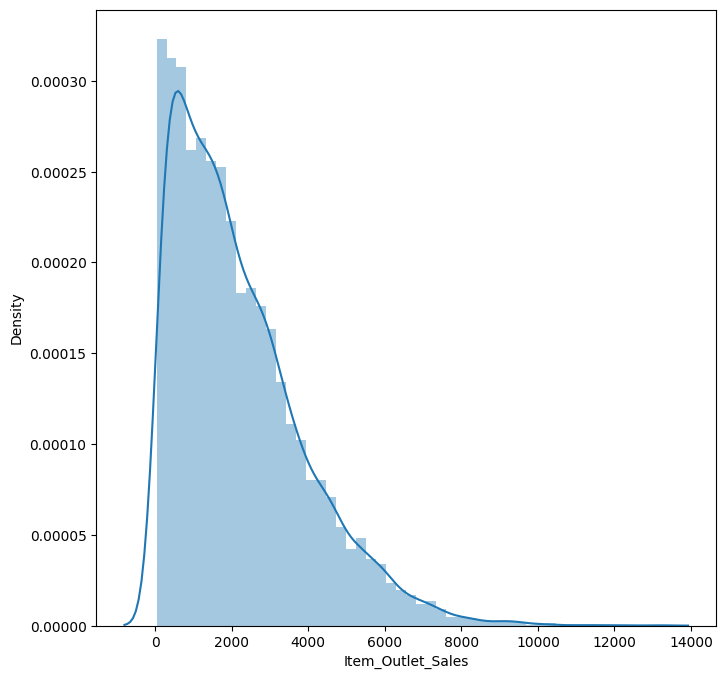

In [51]:
plt.figure(figsize=(8,8))
sns.distplot(bigmart_data['Item_Outlet_Sales'])

<ipython-input-52-3707926278ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_data['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

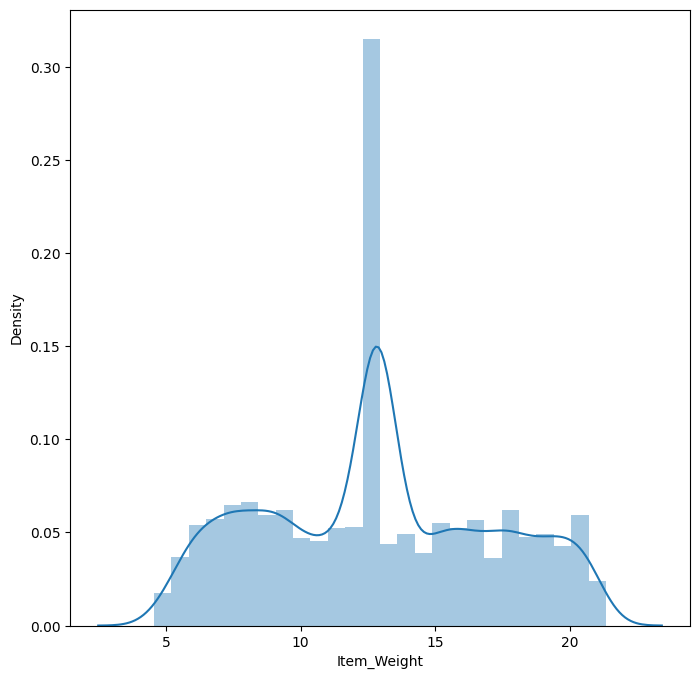

In [52]:
plt.figure(figsize=(8,8))
sns.distplot(bigmart_data['Item_Weight'])

<ipython-input-53-a6a9bdcaa42c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_data['Outlet_Identifier'])


<Axes: xlabel='Outlet_Identifier', ylabel='Density'>

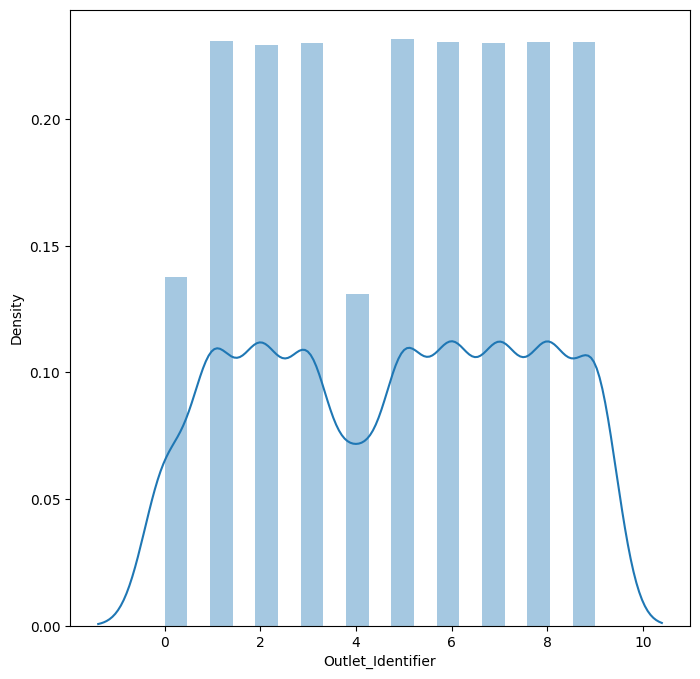

In [53]:

plt.figure(figsize=(8,8))
sns.distplot(bigmart_data['Outlet_Identifier'])


In [55]:
bigmart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

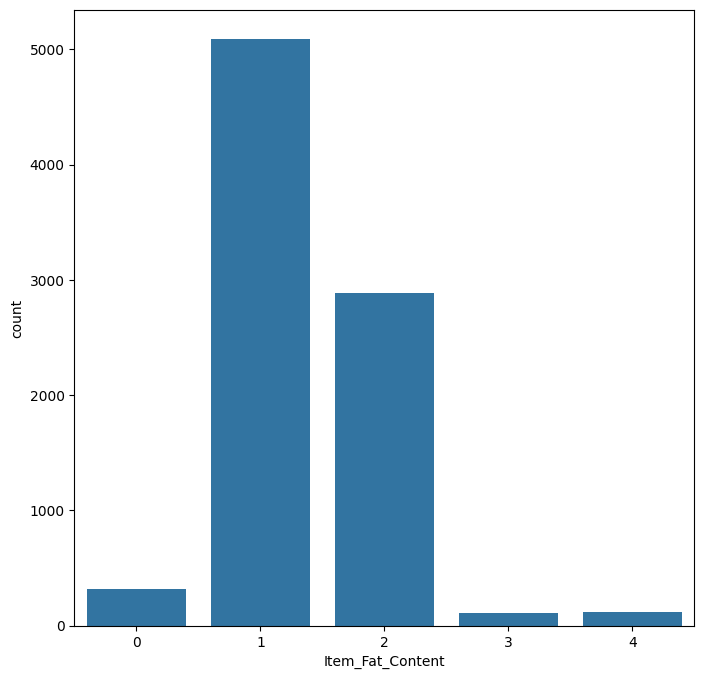

In [56]:
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content',data=bigmart_data)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

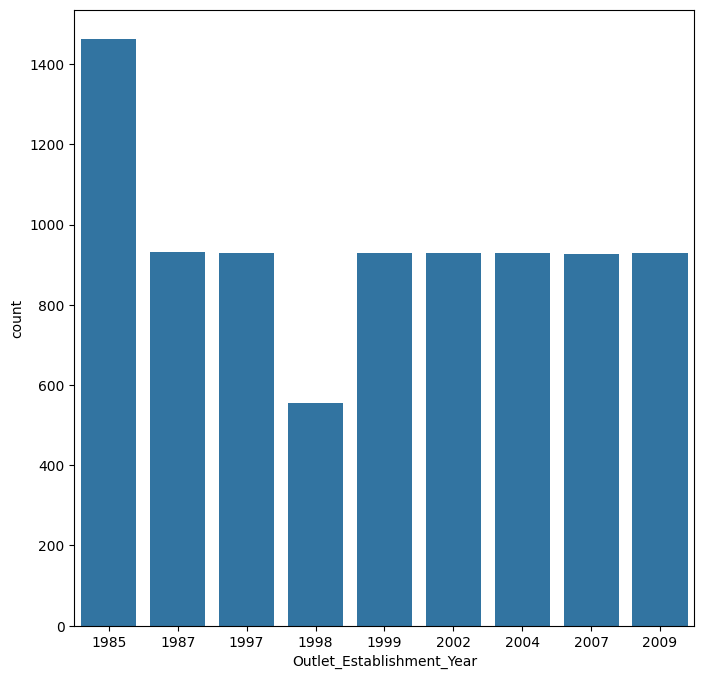

In [57]:
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Establishment_Year',data=bigmart_data)

Text(0.5, 1.0, 'Actual values Vs Predicted Values')

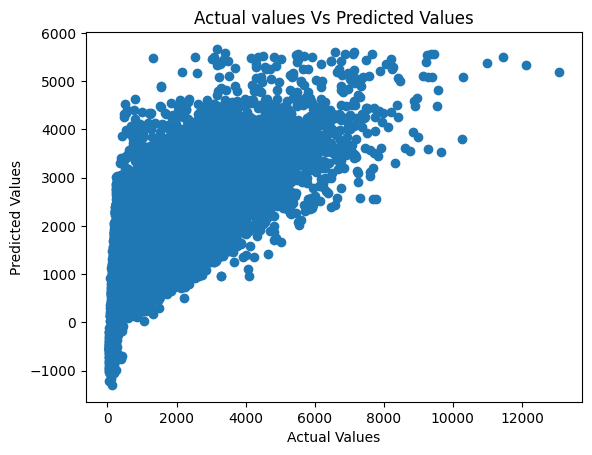

In [60]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual values Vs Predicted Values")